## Определение перспективного тарифа для телеком компании

**Описание проекта**
В компании федерального оператора сотовой связи клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей


Обратить внимание: компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## План работы

1. Открыть файл и изучить общую информацию;
2. Подготовить данные: 
    - Обработать пропуски, заменить типы данных, обработать дубликаты;
    - Посчитать и добавить в таблицу необходимые столбцы; 
3. Провести исследовательский анализ данных;
4. Провести проверку гипотез:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
5. Сделать общий вывод.

## Шаг 1. Изучение общей информации

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Загрузим библиотеки
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Загрузим данные 
filenames = ['/datasets/users.csv', '/datasets/calls.csv', '/datasets/messages.csv', 
             '/datasets/internet.csv', '/datasets/tariffs.csv']
users, calls, messages, internet, tariffs = [pd.read_csv(file) for file in filenames]
df_names = [users, calls, messages, internet, tariffs]
#Посмотрим базовую информацию
for i in range(len(filenames)):
    filenames[i]
    df_names[i].head(10)
    df_names[i].info()

'/datasets/users.csv'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


'/datasets/calls.csv'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


'/datasets/messages.csv'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


'/datasets/internet.csv'

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


'/datasets/tariffs.csv'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод**

Беглый осмотр таблиц и информации по ним показывает, что пропусков в необходимых нам столбцах нет, но в таблице calls есть нулевые значения, которые надо будет дальше исследовать и либо заменять, либо отбрасывать. Необходимо будет проверить таблицу internet также на нули и их обработать. 

В интересующих нас таблицах calls, messages и internet надо будет перевести даты в формат datetime и выделить месяц. В таблицах calls и internet округлить значения наверх в соответствии с правилами оператора.  Затем надо сделать по этим таблицам сводные, сгруппировав данные по пользователям и месяцам. 

Наконец, для анализа нам необходима сводная таблица по пользователям и тому, сколько минут, сообщений и мегабайт они используют в месяц. В ней надо будет проверить пропуски и заполнить их. Затем мы сможем по ней посчитать выручку с каждого клиента в месяц, учитывая минуты, сообщения и гигабайты сверх пакета, и добавить ее в новый столбец profit_per_user.


## Шаг 2. Подготовка данных и добавление расчетов

Рассмотрим таблицы users, calls, messages и internet по очереди, сделаем необходимые замены типов данных, уберем ошибки и добавим расчеты, сделав сводные таблицы. 

Для каждого пользователя посчитаем:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Таблица users

In [4]:
#Удалим ненужные столбцы
users = users.drop(['age', 'first_name', 'last_name', 'churn_date', 'reg_date'], axis=1)

#Переведем тип данных tariff в категорию
users['tariff'] = users['tariff'].astype('category')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
user_id    500 non-null int64
city       500 non-null object
tariff     500 non-null category
dtypes: category(1), int64(1), object(1)
memory usage: 8.5+ KB


#### Таблица calls

In [5]:
#Посмотрим количество звонков длительностью 0
len(calls[calls.duration == 0]) / len(calls)

0.19551644316336553

У большого количества звонков длительность — 0.0 минут (почти 20% звонков). В описании тарифов указано, что "если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута".  Соответственно, можно удалить те звонки, которые длились меньше 1 сек, а те, которые длились от 1 сек до 59 заменить на 1 минуту.
Стоит заметить, что в таблице указана длительность по минутам с сотыми долями, а не с секундами. Поэтому надо по пропорции высчитать, что 1 сек - это 1.6 сотая доля, и тогда мы убираем звонки < 0.0016, которые есть, но их не видно без срезов

In [6]:
#Проверим, сколько звонков не тарифицируются (меньше 1 сек)
len(calls[calls.duration < 0.016]) / len(calls)

#Проверим, сколько звонков тарифицируются (больше 1 сек)
len(calls.query('0.016 <= duration < 1')) / len(calls)

0.19601494518945545

0.04053660534927224

In [7]:
#Заменим длительность звонков с 0 на 1 мин для тех, которые длились дольше 1 сек. Затем проверим
calls.loc[(calls['duration'] >=0.016) & (calls['duration']< 1 ), 'duration']  = 1
len(calls.query('0.016 <= duration < 1'))

0

In [8]:
#Выделим индексы звонков меньше 1 сек и удалим эти строки
index_drop = calls.index[calls.duration < 0.016]
index_drop
calls = calls.drop(index_drop)

#Проверим, сколько звонков не тарифицируются (меньше 1 сек)
len(calls[calls.duration < 0.016])

Int64Index([     0,      1,      5,      6,      9,     36,     38,     39,
                40,     47,
            ...
            202557, 202559, 202560, 202562, 202577, 202590, 202592, 202593,
            202594, 202596],
           dtype='int64', length=39714)

0

In [9]:
#Округлим продолжительность минут вверх по правилам оператора
calls['duration'] = np.ceil(calls['duration'])
calls.head(10)

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
10,1000_10,2018-08-22,6.0,1000
11,1000_11,2018-05-28,19.0,1000
12,1000_12,2018-07-05,3.0,1000
13,1000_13,2018-09-29,8.0,1000
14,1000_14,2018-12-11,10.0,1000


In [10]:
#Заменим значения call_date на тип datetime и добавим столбец с месяцем
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162893 entries, 2 to 202606
Data columns (total 5 columns):
id           162893 non-null object
call_date    162893 non-null datetime64[ns]
duration     162893 non-null float64
user_id      162893 non-null int64
month        162893 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.5+ MB


In [11]:
#Сделаем сводную таблицу по количеству и продолжительности звонков по месяцам для каждого абонента
calls_piv = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_piv.columns = ['number_of_calls', 'calls_duration']
calls_piv

number_of_calls  calls_duration
user_id month                                 
1000    5                   17           159.0
        6                   28           172.0
        7                   41           340.0
        8                   42           408.0
        9                   46           466.0
...                        ...             ...
1498    10                  30           247.0
1499    9                    8            70.0
        10                  44           449.0
        11                  62           612.0
        12                  56           492.0

[3168 rows x 2 columns]

#### Таблица messages

In [12]:
#Заменим значения message_date на тип datetime и добавим столбец с месяцем
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [13]:
#Сделаем сводную таблицу по количеству сообщений по месяцам для каждого абонента
messages_piv = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_piv.columns = ['number_of_messages']
messages_piv

number_of_messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

#### Таблица internet

In [14]:
#Заменим значения session_date на тип datetime и добавим столбец с месяцем
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


In [15]:
#Посмотрим количество сессий длительностью 0 мб
len(internet[internet.mb_used == 0]) / len(internet)

0.13118155773916304

In [16]:
#Выделим индексы сессий в 0 мб и удалим эти строки
int_index_drop = internet.index[internet.mb_used == 0]
int_index_drop
internet = internet.drop(int_index_drop)
internet.query('mb_used == 0')

Int64Index([    11,     38,     46,     67,     72,    103,    111,    131,
               143,    157,
            ...
            149360, 149361, 149366, 149372, 149373, 149380, 149381, 149383,
            149386, 149393],
           dtype='int64', length=19598)

,Unnamed: 0,id,mb_used,session_date,user_id,month


In [17]:
#Округлим продолжительность минут вверх по правилам оператора
internet['mb_used'] = np.ceil(internet['mb_used'])
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
5,5,1000_5,400.0,2018-10-02,1000,10
6,6,1000_6,541.0,2018-09-07,1000,9
7,7,1000_7,416.0,2018-07-11,1000,7
8,8,1000_8,506.0,2018-10-08,1000,10
9,9,1000_9,346.0,2018-09-03,1000,9


In [18]:
#Сделаем сводную таблицу по количеству использованных мегабайт по месяцам для каждого абонента
internet_piv = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_piv

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3201 rows x 1 columns]

### Объединение информации

In [19]:
#Объединим данные по звонком, сообщениям и использования интернета и сбросим индекс
by_month = calls_piv.join(messages_piv).join(internet_piv)
by_month.reset_index(inplace=True)
by_month.head()

,user_id,month,number_of_calls,calls_duration,number_of_messages,mb_used
0,1000,5,17,159.0,22.0,2256.0
1,1000,6,28,172.0,60.0,23257.0
2,1000,7,41,340.0,75.0,14016.0
3,1000,8,42,408.0,81.0,14070.0
4,1000,9,46,466.0,57.0,14581.0


In [20]:
#Объединим полученную таблицу с таблицей по пользователям
by_users = users.merge(by_month, on='user_id')
by_users.head(10)

,user_id,city,tariff,month,number_of_calls,calls_duration,number_of_messages,mb_used
0,1000,Краснодар,ultra,5,17,159.0,22.0,2256.0
1,1000,Краснодар,ultra,6,28,172.0,60.0,23257.0
2,1000,Краснодар,ultra,7,41,340.0,75.0,14016.0
3,1000,Краснодар,ultra,8,42,408.0,81.0,14070.0
4,1000,Краснодар,ultra,9,46,466.0,57.0,14581.0
5,1000,Краснодар,ultra,10,44,350.0,73.0,14717.0
6,1000,Краснодар,ultra,11,37,338.0,58.0,14768.0
7,1000,Краснодар,ultra,12,38,333.0,70.0,9827.0
8,1001,Москва,smart,11,45,430.0,NaN,18452.0
9,1001,Москва,smart,12,46,413.0,NaN,14053.0


In [21]:
#Проверим количество пропусков
by_users.isnull().sum()

user_id                 0
city                    0
tariff                  0
month                   0
number_of_calls         0
calls_duration          0
number_of_messages    495
mb_used                13
dtype: int64

Есть пропуски в количестве сообщений и использованных гигабайтов - это там, где данных нет для определенного месяца. Заменим их на 0.

In [22]:
#Заполним пропуски нулями
by_users['number_of_messages'] = by_users['number_of_messages'].fillna(0)
by_users['mb_used'] = by_users['mb_used'].fillna(0)
by_users.isnull().sum()

user_id               0
city                  0
tariff                0
month                 0
number_of_calls       0
calls_duration        0
number_of_messages    0
mb_used               0
dtype: int64

### Добавление расчетов

In [23]:
#Выведем еще раз таблицу
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
#Создадим переменные с данными для каждого тарифа
smart_monthly_fee = tariffs.loc[0, 'rub_monthly_fee']
smart_min_included = tariffs.loc[0, 'minutes_included']
smart_messages_included = tariffs.loc[0, 'messages_included']
smart_mb_included = tariffs.loc[0, 'mb_per_month_included']
smart_rub_per_min = tariffs.loc[0, 'rub_per_minute']
smart_rub_per_message = tariffs.loc[0, 'rub_per_message']
smart_rub_per_gb = tariffs.loc[0, 'rub_per_gb']

ultra_monthly_fee = tariffs.loc[1, 'rub_monthly_fee']
ultra_min_included = tariffs.loc[1, 'minutes_included']
ultra_messages_included = tariffs.loc[1, 'messages_included']
ultra_mb_included = tariffs.loc[1, 'mb_per_month_included']
ultra_rub_per_min = tariffs.loc[1, 'rub_per_minute']
ultra_rub_per_message = tariffs.loc[1, 'rub_per_message']
ultra_rub_per_gb = tariffs.loc[1, 'rub_per_gb']

In [25]:
#Создадим функцию для подсчета помесячной выручки с каждого пользователя 
def count_profit(row):
    '''
    Функция принимает строку, сравнивает значения с указанными по тарифу и возвращает выручку с каждого клиента,
    с учетом дополнительно использованных минут, сообщений и гигабайтов
    '''
    tariff = row[0]
    calls_duration = row[1]
    number_of_messages = row[2]
    mb_used = row[3]
    extra_min = 0
    extra_messages = 0
    extra_gb = 0
    if tariff == 'smart':
        if calls_duration > smart_min_included:
            extra_min = (calls_duration - smart_min_included) * smart_rub_per_min
        if number_of_messages > smart_messages_included:
            extra_messages = (number_of_messages - smart_min_included) * smart_rub_per_message
        if mb_used > smart_mb_included:
            extra_gb = (mb_used - smart_mb_included) / 1024 * smart_rub_per_gb
        return smart_monthly_fee + extra_min + extra_messages + extra_gb
    else:
        if calls_duration > ultra_min_included:
            extra_min = (calls_duration - ultra_min_included) * ultra_rub_per_min
        if number_of_messages > ultra_messages_included:
            extra_messages = (number_of_messages - ultra_messages_included) * ultra_rub_per_message
        if mb_used > ultra_mb_included:
            extra_gb = (mb_used - ultra_mb_included) / 1024 * ultra_rub_per_gb
        return ultra_monthly_fee + extra_min + extra_messages + extra_gb
    
#Применим apply и созданную функцию для добавления нового столбца profit_per_user
by_users['profit_per_user'] = by_users[['tariff', 'calls_duration', 'number_of_messages', 'mb_used']]\
                                        .apply(count_profit, axis = 1)
by_users.head(10)

,user_id,city,tariff,month,number_of_calls,calls_duration,number_of_messages,mb_used,profit_per_user
0,1000,Краснодар,ultra,5,17,159.0,22.0,2256.0,1950.00000
1,1000,Краснодар,ultra,6,28,172.0,60.0,23257.0,1950.00000
2,1000,Краснодар,ultra,7,41,340.0,75.0,14016.0,1950.00000
3,1000,Краснодар,ultra,8,42,408.0,81.0,14070.0,1950.00000
4,1000,Краснодар,ultra,9,46,466.0,57.0,14581.0,1950.00000
5,1000,Краснодар,ultra,10,44,350.0,73.0,14717.0,1950.00000
6,1000,Краснодар,ultra,11,37,338.0,58.0,14768.0,1950.00000
7,1000,Краснодар,ultra,12,38,333.0,70.0,9827.0,1950.00000
8,1001,Москва,smart,11,45,430.0,0.0,18452.0,1153.90625
9,1001,Москва,smart,12,46,413.0,0.0,14053.0,550.00000


**Вывод**

Мы предобработали данные (удалили звонки и пустые сессии, которые не тарифицируются, округлили значения вверх для минут и мегабайт), сделали общую сводную таблицу по количеству используемых минут, сообщей, мегабайтов по каждому пользователю в месяц. 

Также была посчитана и добавлена выручка помесячно для каждого клиента. 

## Шаг 3. Анализ данных

Проанализируем поведение клиентов каждого тарифа на предмет:
- количества минут разговора,  
- количества сообщений и 
- объёма интернет-трафика пользователям в месяц. 

Посчитаем среднее количество, дисперсию и стандартное отклонение и построим гистограммы.

In [26]:
#Добавим столбец с количество использованных гигабайт в месяц для удобства
by_users['gb_used'] = by_users['mb_used'] / 1024
by_users.head()

,user_id,city,tariff,month,number_of_calls,calls_duration,number_of_messages,mb_used,profit_per_user,gb_used
0,1000,Краснодар,ultra,5,17,159.0,22.0,2256.0,1950.0,2.203125
1,1000,Краснодар,ultra,6,28,172.0,60.0,23257.0,1950.0,22.711914
2,1000,Краснодар,ultra,7,41,340.0,75.0,14016.0,1950.0,13.687500
3,1000,Краснодар,ultra,8,42,408.0,81.0,14070.0,1950.0,13.740234
4,1000,Краснодар,ultra,9,46,466.0,57.0,14581.0,1950.0,14.239258


In [27]:
#Сделаем соез по тарифам и сохраним в новые датафреймы
smart = by_users.query('tariff == "smart"')[['user_id', 'month', 'calls_duration', 'number_of_messages', 'gb_used']]
ultra = by_users.query('tariff == "ultra"')[['user_id', 'month', 'calls_duration', 'number_of_messages', 'gb_used']]

#Посмотрим процентное соотношение пользователей обоих тарифов
print('Количество пользователей smart {:.2%}'.format(len(smart)/len(by_users)))
print('Количество пользователей ultra {:.2%}'.format(len(ultra)/len(by_users)))

Количество пользователей smart 70.11%
Количество пользователей ultra 29.89%


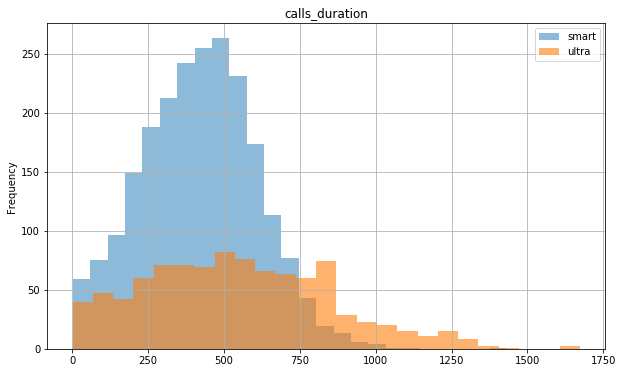

<Figure size 720x288 with 0 Axes>

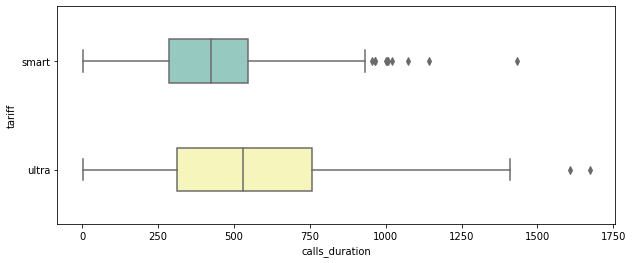

Статистика по smart
Персентили:  0.60    471.0
0.70    520.0
0.80    576.0
0.90    659.0
0.95    727.0
0.99    872.8
Name: calls_duration, dtype: float64
Среднее:  419.40567312021614
Медиана:  423.0
Дисперсия:  35713.73310293634
Стандартное отклонение:  188.98077442675574

Статистика по ultra
Персентили:  0.60     612.00
0.70     708.20
0.80     813.00
0.90     949.80
0.95    1096.70
0.99    1293.78
Name: calls_duration, dtype: float64
Среднее:  547.7296726504752
Медиана:  529.0
Дисперсия:  93330.69005940646
Стандартное отклонение:  305.5007202273122


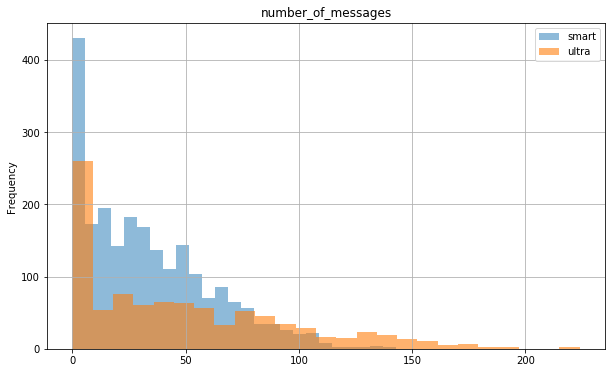

<Figure size 720x288 with 0 Axes>

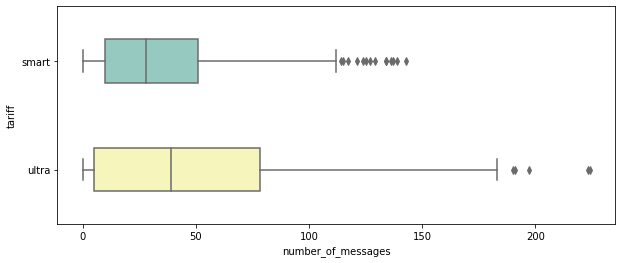

Статистика по smart
Персентили:  0.60     37.0
0.70     46.0
0.80     57.0
0.90     73.0
0.95     88.0
0.99    108.0
Name: number_of_messages, dtype: float64
Среднее:  33.392165691130124
Медиана:  28.0
Дисперсия:  799.2060467040657
Стандартное отклонение:  28.27023251945526

Статистика по ultra
Персентили:  0.60     52.00
0.70     71.00
0.80     87.00
0.90    118.00
0.95    141.70
0.99    174.16
Name: number_of_messages, dtype: float64
Среднее:  48.75923970432946
Медиана:  39.0
Дисперсия:  2171.7263283853986
Стандартное отклонение:  46.60178460515647


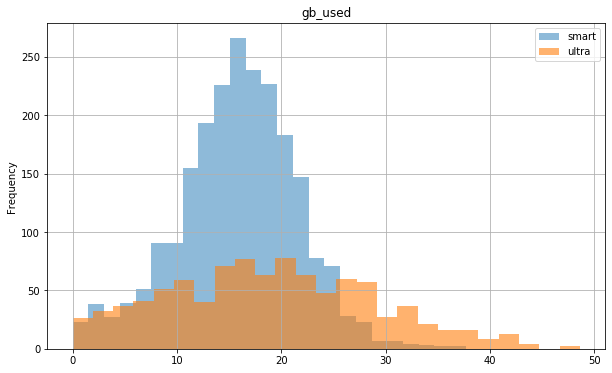

<Figure size 720x288 with 0 Axes>

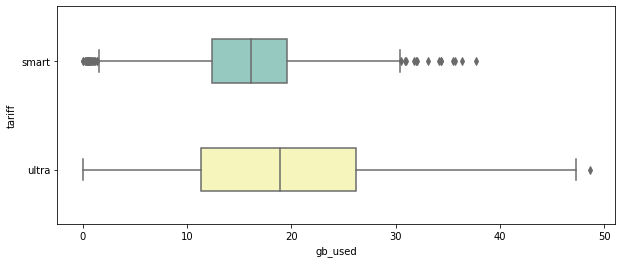

Статистика по smart
Персентили:  0.60    17.459961
0.70    18.881836
0.80    20.508789
0.90    22.704102
0.95    24.581055
0.99    29.038672
Name: gb_used, dtype: float64
Среднее:  15.851037504221072
Медиана:  16.1396484375
Дисперсия:  33.01138891705985
Стандартное отклонение:  5.745553839018467

Статистика по ultra
Персентили:  0.60    21.228516
0.70    24.462500
0.80    27.623047
0.90    32.266602
0.95    36.394141
0.99    42.081309
Name: gb_used, dtype: float64
Среднее:  19.032883447729674
Медиана:  18.8818359375
Дисперсия:  97.99909293729372
Стандартное отклонение:  9.899449122920615


In [28]:
#Выделим столбцы для анализа, построим гистограммы, boxplot'ы и выведем статистику
cols_hist = ['calls_duration', 'number_of_messages', 'gb_used']
for col in cols_hist:
    ax = smart[col].plot(kind='hist', bins=25,
                              linewidth=2, alpha=0.5,  title=col, label='smart', legend=True)
    ultra[col].plot(kind='hist', bins=25, title=col,
                              linewidth=2, alpha=0.6, label='ultra', ax=ax, 
                              grid=True, legend=True, figsize=(10, 6))
    plt.show()
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='tariff', data=by_users, palette="Set3", orient='h', width=0.4)
    plt.show()
    print('Статистика по smart')
    print('Персентили: ', smart[col].quantile([.6, .7, .8, .9, .95, .99]))
    print('Среднее: ', smart[col].mean())
    print('Медиана: ', smart[col].median())
    print('Дисперсия: ', np.var(smart[col], ddof=1))
    print('Стандартное отклонение: ', np.std(smart[col], ddof=1))
    print()
    print('Статистика по ultra')
    print('Персентили: ', ultra[col].quantile([.6, .7, .8, .9, .95, .99]))
    print('Среднее: ', ultra[col].mean())
    print('Медиана: ', ultra[col].median())
    print('Дисперсия: ', np.var(ultra[col], ddof=1))
    print('Стандартное отклонение: ', np.std(ultra[col], ddof=1))

### Вывод

В выборке 70% данных пользователей тарифа smart, что объясняет большую частоту значений smart в целом. 

**Звонки**

Продолжительность звонков абонентов тарифа **smart** имеет нормальное распределение, немного скошенное вправо. Среднее - 397 мин, дисперсия - 32105.64, стандартное отклонение - 179 мин. Анализ персентилей и boxplot'а показывает, что немногим более 70% пользователей тарифа укладываются в пакет минут, остальным требуется больше. 

Продолжительность звонков абонентов тарифа **ultra** имеет уплощенное распределение, напоминающее нормально и скошенное вправо. Разброс данных больше, на что показывают дисперсия и стандартное отклонение. Среднее - 518 мин, дисперсия - 83708.86, стандартное отклонение - 289 мин. Анализ персентилей и boxplot'а показывает, что в этом тарифе наоборот, пользователям более чем достаточно пакета минут - 99% пользователей тратят не более 1225 мин в месяц. 

**Сообщения**

Для smart: среднее - 33, дисперсия - 799.20, стандартное отклонение - 28;

Для ultra: среднее - 48, дисперсия - 2171.72, стандартное отклонение - 46. 

Распределение больше напоминает распределение Пуассона. 

Пользователи ultra отсылают большее количество сообщений, и разброс данных тут больше, чем у пользователей smart. Но при этом графики показывают, что все пользователи ultra укладываются в пакет сообщений с запасом: 99% не используют более 42 сообщений в месяц при возможных 1000, и только чуть меньше 80% пользователей smart укладываются в пакет. Также много пользователей, которые не пользуются сообщениями в обоих тарифах. 

**Интернет**

Для smart: среднее - 15.8, дисперсия - 32.93, стандартное отклонение - 5;

Для ultra: среднее - 19, дисперсия - 97.82, стандартное отклонение - 9.

Количество использованных гигабайт абонентов тарифа **smart** имеет нормальное распределение. При этом графики и персентили показывают, что меньше 50% пользователей хватает пакета гигабайтов (даже среднее выше 15Гб, а медиана - выше 16). Можно предположить, что данный факт может вызывать недовольство пользователей, так как им часто приходится доплачивать за интернет. 

Количество использованых гигабайт абонентов тарифа **ultra** имеет уплощенное распределение, напоминающее нормально и скошенное вправо. Разброс данных больше, на что показывают дисперсия и стандартное отклонение. При этом пакета интернета хватает менее 90% пользователям. 

**Можно суммировать, что пользователям тарифа smart чаще не хватает пакета услуг, особенно это касается интернета, а пользователи ultra редко используют свой пакет полностью, и только иногда доплачивают за интернет. Таким образом оператору имеет смысл пересмотреть оба пакета для их оптимизации.** 

Как вариант для дальнейшего анализа можно предложить следующие цифры, округляя полученные значения на 90-95% абонентов
- smart - 650 мин, 80 сообщений, 25 гб (т.е. увеличить объем пакета),
- ultra - 1300 мин, 200 сообщений, 35 гб (т.е. уменьшить объем пакета).

## Шаг 4. Проверка гипотез

Необходимо проверить следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Мы имеем две независимые выборки - абоненты разных тарифов, поэтому будем применять ttest_ind из пакета scipy.stat - надо определеить, значима ли разница между средними выборок учитывая их дисперсию. Добавим аргумент equal_var=False, так как анализ выше показал, что дисперсии выборок отличаются. Возьмем пороговое значение alpha 0.5 как стандартное.

Нулевая гипотеза формулируется так, чтобы можно было использовать знак равенства. Таким образом получаем следующий набор гипотез:
- Сравнение двух тарифов:
     - Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.
     - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

- Сравнение абонентов из Москвы и из других городов:
     - Средняя выручка пользователей из Москвы и из других регионов одинаковая.
     - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


#### Сравнение друх тарифов

In [29]:
#Создадим новые датафреймы, объединив информацию по пользователям
by_users_avg_smart = by_users.query('tariff == "smart"').groupby('user_id').mean()
by_users_avg_smart['tariff'] = 'smart'
by_users_avg_smart.head()
by_users_avg_ultra = by_users.query('tariff == "ultra"').groupby('user_id').mean()
by_users_avg_ultra['tariff'] = 'ultra'
by_users_avg_ultra.head()

#Соединим их в новую таблицу, чтобы потом посмотреть статитику
by_users_avg = by_users_avg_smart.append(by_users_avg_ultra)
by_users_avg.info()

,month,number_of_calls,calls_duration,number_of_messages,mb_used,profit_per_user,gb_used,tariff
user_id,,,,,,,,
1001,11.5,45.500000,421.500000,0.0,16252.500000,851.953125,15.871582,smart
1002,9.0,24.714286,216.714286,10.0,16597.571429,957.561384,16.208566,smart
1005,6.5,60.000000,550.333333,46.0,8317.750000,151.750000,8.122803,smart
1006,7.0,37.454545,318.272727,0.0,14945.000000,873.845881,14.594727,smart
1007,8.0,53.444444,486.555556,25.0,14643.555556,865.636285,14.300347,smart


,month,number_of_calls,calls_duration,number_of_messages,mb_used,profit_per_user,gb_used,tariff
user_id,,,,,,,,
1000,8.5,36.625,320.750,62.0,13436.5,1950.0,13.121582,ultra
1003,10.0,85.600,764.400,76.0,11465.8,1950.0,11.197070,ultra
1004,8.5,17.375,123.375,149.0,18646.5,1950.0,18.209473,ultra
1013,11.5,53.000,468.000,21.0,15272.5,1950.0,14.914551,ultra
1016,11.5,7.000,61.000,71.0,13417.0,1950.0,13.102539,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1001 to 1495
Data columns (total 8 columns):
month                 492 non-null float64
number_of_calls       492 non-null float64
calls_duration        492 non-null float64
number_of_messages    492 non-null float64
mb_used               492 non-null float64
profit_per_user       492 non-null float64
gb_used               492 non-null float64
tariff                492 non-null object
dtypes: float64(7), object(1)
memory usage: 34.6+ KB


In [30]:
#Посмотрим на статистику по тарифам, применив группировку
by_users_avg.groupby(['tariff'])['profit_per_user'].agg(['count','mean','median', 'sum', 'std'])

,count,mean,median,sum,std
tariff,,,,,
smart,349,936.773852,890.5,326934.074437,746.197541
ultra,143,2075.908060,1950.0,296854.852623,283.472717


In [31]:
#Проверям первую гипотезу
tariffs_h0 = 'средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.'
tariffs_h1 = 'средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.'
alpha = .05
smart_profit = by_users_avg_smart['profit_per_user']
ultra_profit = by_users_avg_ultra['profit_per_user']

results = st.ttest_ind(smart_profit, ultra_profit, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Иначе говоря,", tariffs_h1)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Иначе говоря,", tariffs_h0)

p-значение: 3.80751618733913e-87
Отвергаем нулевую гипотезу. Иначе говоря, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.


#### Сравнение Москвы и других городов

In [32]:
#Добавим столбец с категорией Москва или нет
def define_city_cat(col):
    if col == 'Москва':
        return 'Москва'
    else:
        return 'Другой'
by_users['city_category'] = by_users['city'].apply(define_city_cat).astype('category')
by_users.head()

,user_id,city,tariff,month,number_of_calls,calls_duration,number_of_messages,mb_used,profit_per_user,gb_used,city_category
0,1000,Краснодар,ultra,5,17,159.0,22.0,2256.0,1950.0,2.203125,Другой
1,1000,Краснодар,ultra,6,28,172.0,60.0,23257.0,1950.0,22.711914,Другой
2,1000,Краснодар,ultra,7,41,340.0,75.0,14016.0,1950.0,13.687500,Другой
3,1000,Краснодар,ultra,8,42,408.0,81.0,14070.0,1950.0,13.740234,Другой
4,1000,Краснодар,ultra,9,46,466.0,57.0,14581.0,1950.0,14.239258,Другой


In [33]:
#Агрегируем по пользователю и создадим новую таблицу
by_users_avg_city = by_users.groupby('user_id')[['tariff', 'profit_per_user', 'city_category']]\
                            .agg({'tariff': 'first','profit_per_user':'mean', 'city_category':'first'})
by_users_avg_city.head()


,tariff,profit_per_user,city_category
user_id,,,
1000,ultra,1950.000000,Другой
1001,smart,851.953125,Москва
1002,smart,957.561384,Другой
1003,ultra,1950.000000,Москва
1004,ultra,1950.000000,Другой


,mean,median,sum,count,std
city_category,,,,,
Другой,1264.697094,1270.990625,497025.957776,393,841.266814
Москва,1280.434033,1341.406250,126762.969283,99,778.266508


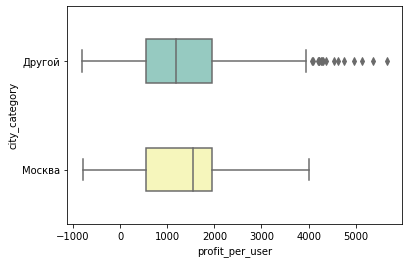

In [34]:
#Выведем сводную таблицу и график
moscow_vs_others = by_users_avg_city.pivot_table(index='city_category', values='profit_per_user',
                                        aggfunc=['mean', 'median', 'sum', 'count', 'std'])
moscow_vs_others.columns = ['mean', 'median', 'sum', 'count', 'std']
moscow_vs_others
sns.boxplot(x='profit_per_user', y='city_category', data=by_users, palette="Set3", orient='h', width=0.4)

In [35]:
#Проверям вторую гипотезу
cities_h0 = 'средняя выручка пользователей из Москвы и из других регионов одинаковая.'
cities_h1 = 'средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.'
alpha = .05 
moscow_profit = by_users_avg_city[by_users_avg_city.city_category == 'Москва']['profit_per_user']
other_profit = by_users_avg_city[by_users_avg_city.city_category == 'Другой']['profit_per_user']

results = st.ttest_ind(moscow_profit, other_profit)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Иначе говоря,", cities_h1)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Иначе говоря,", cities_h0)

p-значение: 0.8660240671428878
Не получилось отвергнуть нулевую гипотезу. Иначе говоря, средняя выручка пользователей из Москвы и из других регионов одинаковая.


### Вывод

Статистическая проверка **первой гипотезы о разнице выручки с тарифов** показывает, что несмотря на разную дисперсию среднее выборок отличается. Мы видим, что несмотря на то, что пользователи тарифа ultra составляют только около 30% от всех пользователей, они приносят почти такую же выручки (1 952 659 (ultra) и 1 980 256 (smart)), и средняя месячная выручка по ним тоже выше (2061 (ultra) и 891 (smart)). 

Статистическая проверка **второй гипотезы о разности выручки с Москвы и других городов** не позволила отвергнуть нулевую гипотезу, соответственно, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 

## Шаг 5. Общий вывод

Был произведен анализ данных на предмет выяснения какой тариф приносит больше денег для корректирования рекламного бюджета коммерческим департаментом.

1. После предобработки данных (удаления звонков и сессий, которые не тарифицируются, округления значений вверх для минут и мегабайт), была сдалана сводная таблицу по количеству используемых минут, сообщений, мегабайт по каждому пользователю за месяц. На основании этой таблицы была посчитана выручка помесячно для каждого клиента. 


2. Далее было проанализировано поведение клиентов двух тарифных планов, smart и ultra. Было выявлено следующее.

Примерно 70% выборки составляют пользователи тарифа smart. Разброс данный у пользователей ultra при этом больше.

**Звонки**

Средняя продолжительность звонков абонентов тарифа **smart** - 397 мин. Анализ персентилей и boxplot'а показал, что немногим более 70% пользователей тарифа укладываются в пакет минут, остальным требуется больше. 

Средняя продолжительность звонков абонентов тарифа **ultra** - 518 мин. Анализ персентилей и boxplot'а показал, что в этом тарифе наоборот, пользователям более чем достаточно пакета минут - 99% пользователей тратят не более 1225 мин в месяц. 

**Сообщения**

Для smart среднее количество отсылаемых сообщений - 33; для ultra - 48. 

Пользователи ultra отсылают больше сообщений. Но при этом графики показывают, что все пользователи ultra укладываются в пакет сообщений с запасом: 99% не используют более 42 сообщений в месяц при возможных 1000, и только чуть меньше 80% пользователей smart укладываются в пакет. Также много пользователей, которые мало пользуются сообщениями в обоих тарифах. 

**Интернет**

Для smart среднее количество гигабайт - 15.8, а для ultra - 19.

Графики и персентили показали, что менее 90% пользователям **ultra** и менее 50% пользователей **smart** хватает пакета гигабайтов (даже среднее выше 15Гб, а медиана - выше 16). Можно предположить, что данный факт может вызывать недовольство пользователей, так как им часто приходится доплачивать за интернет.

**В целом можно выделить, что пользователям тарифа smart чаще не хватает пакета услуг, особенно это касается интернета, а пользователи ultra редко используют свой пакет полностью, и только иногда доплачивают за интернет. Таким образом оператору имеет смысл пересмотреть оба пакета для их оптимизации.** 

Как вариант для дальнейшего анализа можно предложить следующие цифры, округляя полученные значения на 90% абонентов
    - smart - 650 мин, 80 сообщений, 25 гб (т.е. увеличить объем пакета),
    - ultra - 1300 мин, 200 сообщений, 35 гб (т.е. уменьшить объем пакета).


3. Были проверены следующие гипотезы: 
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Статистическая проверка **первой гипотезы о разнице выручки с тарифов** показала, что несмотря на разную дисперсию среднее выборок отличается. Несмотря на то, что пользователи тарифа ultra составляют только около 30% от всех пользователей, они приносят почти такую же выручки (1 952 659 (ultra) и 1 980 256 (smart)), и средняя месячная выручка по ним тоже выше (2061 (ultra) и 891 (smart)). 

Статистическая проверка **второй гипотезы о разности выручки с Москвы и других городов** не позволила отвергнуть нулевую гипотезу, соответственно, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 